# Problem 1


In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
def simulate_disc_drops(d, n_tosses = 4444444):
    y_positions = np.random.uniform(0, 1, n_tosses)
    P = {1: 0, 2: 0, 3: 0}
    
    for y in y_positions:
        r = d / 2
        
        if d <= 1:
            P[2], P[3] = 0, 0
            dmin = min(y, 1 - y)
            if dmin < r:
                P[1] += 1
        elif d <= 2:
            P[1], P[3] = n_tosses, 0
            dmax = max(y, 1 - y)
            if dmax < r:
                P[2] += 1
        else:
            P[1], P[2] = n_tosses, n_tosses
            dmin = min(y, 1 - y)
            if dmin + 1 < r:
                P[3] += 1
    return P

In [56]:
# Run simulation
diameters = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 2.0, 3.0]
p1 = []
p2 = []
p3 = []
total_tosses = 4444444

for d in diameters:
    print(f"Simulating diameter {d}...")
    P = simulate_disc_drops(d)
    one, two, three = P[1], P[2], P[3]
    
    p1.append(one / total_tosses)
    p2.append(two / total_tosses)
    p3.append(three / total_tosses)

Simulating diameter 0.1...
Simulating diameter 0.2...
Simulating diameter 0.3...
Simulating diameter 0.4...
Simulating diameter 0.5...
Simulating diameter 0.6...
Simulating diameter 0.7...
Simulating diameter 0.8...
Simulating diameter 0.9...
Simulating diameter 1.0...
Simulating diameter 1.5...
Simulating diameter 2.0...
Simulating diameter 3.0...


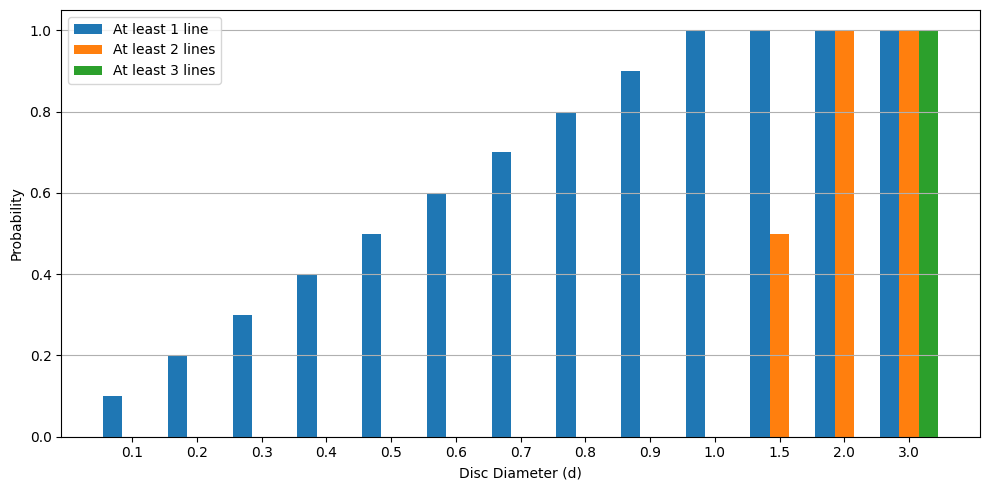


Diameter  |  1 line  |  2 lines  |  3 lines
--------------------------------------------------
d =  0.1  | 0.100046 | 0.000000 | 0.000000
d =  0.2  | 0.199708 | 0.000000 | 0.000000
d =  0.3  | 0.299723 | 0.000000 | 0.000000
d =  0.4  | 0.400262 | 0.000000 | 0.000000
d =  0.5  | 0.499676 | 0.000000 | 0.000000
d =  0.6  | 0.600595 | 0.000000 | 0.000000
d =  0.7  | 0.700091 | 0.000000 | 0.000000
d =  0.8  | 0.800092 | 0.000000 | 0.000000
d =  0.9  | 0.900026 | 0.000000 | 0.000000
d =  1.0  | 1.000000 | 0.000000 | 0.000000
d =  1.5  | 1.000000 | 0.499866 | 0.000000
d =  2.0  | 1.000000 | 1.000000 | 0.000000
d =  3.0  | 1.000000 | 1.000000 | 1.000000


In [ ]:
# Plot results
x = np.arange(len(diameters))
width = 0.3  # Width of bars

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x - width, p1, width, label='At least 1 line')
ax.bar(x, p2, width, label='At least 2 lines')
ax.bar(x + width, p3, width, label='At least 3 lines')

# Customize the plot
ax.set_xlabel('Disc Diameter')
ax.set_ylabel('Probability')
ax.set_xticks(x)
ax.set_xticklabels(diameters)
ax.legend()
ax.grid(True, axis='y')  # Only show horizontal grid lines

plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

# Print all probabilities
print("\nDiameter  |  1 line  |  2 lines  |  3 lines")
print("-" * 50)
for d, p_one, p_two, p_three in zip(diameters, p1, p2, p3):
    print(f"d = {d:4.1f}  | {p_one:7.6f} | {p_two:8.6f} | {p_three:8.6f}")